# Binary CNN

In [52]:
# For Data Processing
import numpy as np
import pandas as pd
import os
import random
from sklearn.utils import shuffle
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import seaborn as sns


# For ML Models
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
import sklearn.metrics as metrics
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.utils import resample

In [53]:
os.getcwd()

'/Users/teoyinyin/Desktop/Filtered_Data'

In [54]:
os.chdir('Filtered_Data')

FileNotFoundError: [Errno 2] No such file or directory: 'Filtered_Data'

In [55]:
#Paths to data directories
no_advisory_dir = './No_Advisory'
warning_dir = './Warning'
caution_dir = './Caution'
danger_dir = './Danger'

#Pull in training data
no_advisory_data = []
no_advisory_labels = []

warning_data = []
warning_labels = []

caution_data = []
caution_labels = []

danger_data = []
danger_labels = []

#getting the paths and labels of our no_advisory data

for image in os.listdir(no_advisory_dir):
    no_advisory_data.append(no_advisory_dir+'/'+image)
    no_advisory_labels.append('no_advisory')

#getting the paths and labels of our warning data
for image in os.listdir(warning_dir):
    warning_data.append(warning_dir+'/'+image)
    warning_labels.append('warning')
        
#getting the paths and labels of our caution data
for image in os.listdir(caution_dir):
    caution_data.append(caution_dir+'/'+image)
    caution_labels.append('caution')

#getting the paths and labels of our danger data
for image in os.listdir(danger_dir):
    danger_data.append(danger_dir+'/'+image)
    danger_labels.append('danger')

no_advisory_data, no_advisory_labels = shuffle(no_advisory_data, no_advisory_labels)
warning_data, warning_labels = shuffle(warning_data, warning_labels)
caution_data, caution_labels = shuffle(caution_data, caution_labels)
danger_data, danger_labels = shuffle(danger_data, danger_labels)

In [56]:
df_no_advisory = pd.DataFrame({'image_path': no_advisory_data, 'label':no_advisory_labels})
df_warning = pd.DataFrame({'image_path': warning_data, 'label':warning_labels})
df_caution = pd.DataFrame({'image_path': caution_data, 'label':caution_labels})
df_danger = pd.DataFrame({'image_path': danger_data, 'label':danger_labels})

## Distribution of Images

See below for the distribution of images across all microsystin levels.

In [57]:
# append cayuga and clear_lake df
df = pd.concat([df_no_advisory, df_warning, df_caution, df_danger], ignore_index = True)
df

image_path        label
0    ./No_Advisory/362_image3-20201209-153323.jpg  no_advisory
1     ./No_Advisory/BloomImg1-20221214-133439.jpg  no_advisory
2                           ./No_Advisory/L14.png  no_advisory
3     ./No_Advisory/BloomImg1-20230725-115149.jpg  no_advisory
4                      ./No_Advisory/5AJ9UN~4.PNG  no_advisory
..                                            ...          ...
554                         ./Danger/5AF1D1~1.PNG       danger
555                              ./Danger/L4b.png       danger
556                         ./Danger/5AF132~1.PNG       danger
557                         ./Danger/5A5903~1.PNG       danger
558                              ./Danger/L4t.png       danger

[559 rows x 2 columns]

In [58]:
df['label'].value_counts()

danger         182
no_advisory    137
caution        137
warning        103
Name: label, dtype: int64

In [59]:
# Stratify by microsystin levels
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

In [60]:
# Define a dictionary with the mappings
label_mapping = {
    'no_advisory': 0,
    'caution': 1,
    'warning': 1,
    'danger': 1
}

# Create the 'encoded_labels' column
train_df['encoded_labels'] = train_df['label'].map(label_mapping)
test_df['encoded_labels'] = test_df['label'].map(label_mapping)

In [61]:
train_df['encoded_labels'].value_counts()

1    337
0    110
Name: encoded_labels, dtype: int64

In [62]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = train_df[train_df['encoded_labels'] == 1]
minority_class = train_df[train_df['encoded_labels'] == 0]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match the number in the majority class
                              random_state=42)  # Set a random seed for reproducibility

# Concatenate the majority class and upsampled minority class
upsampled_train_df = pd.concat([majority_class, minority_upsampled])

# Shuffle the DataFrame to mix the classes
upsampled_train_df = upsampled_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [63]:
upsampled_train_df['encoded_labels'].value_counts()

0    337
1    337
Name: encoded_labels, dtype: int64

## Visualize the Images

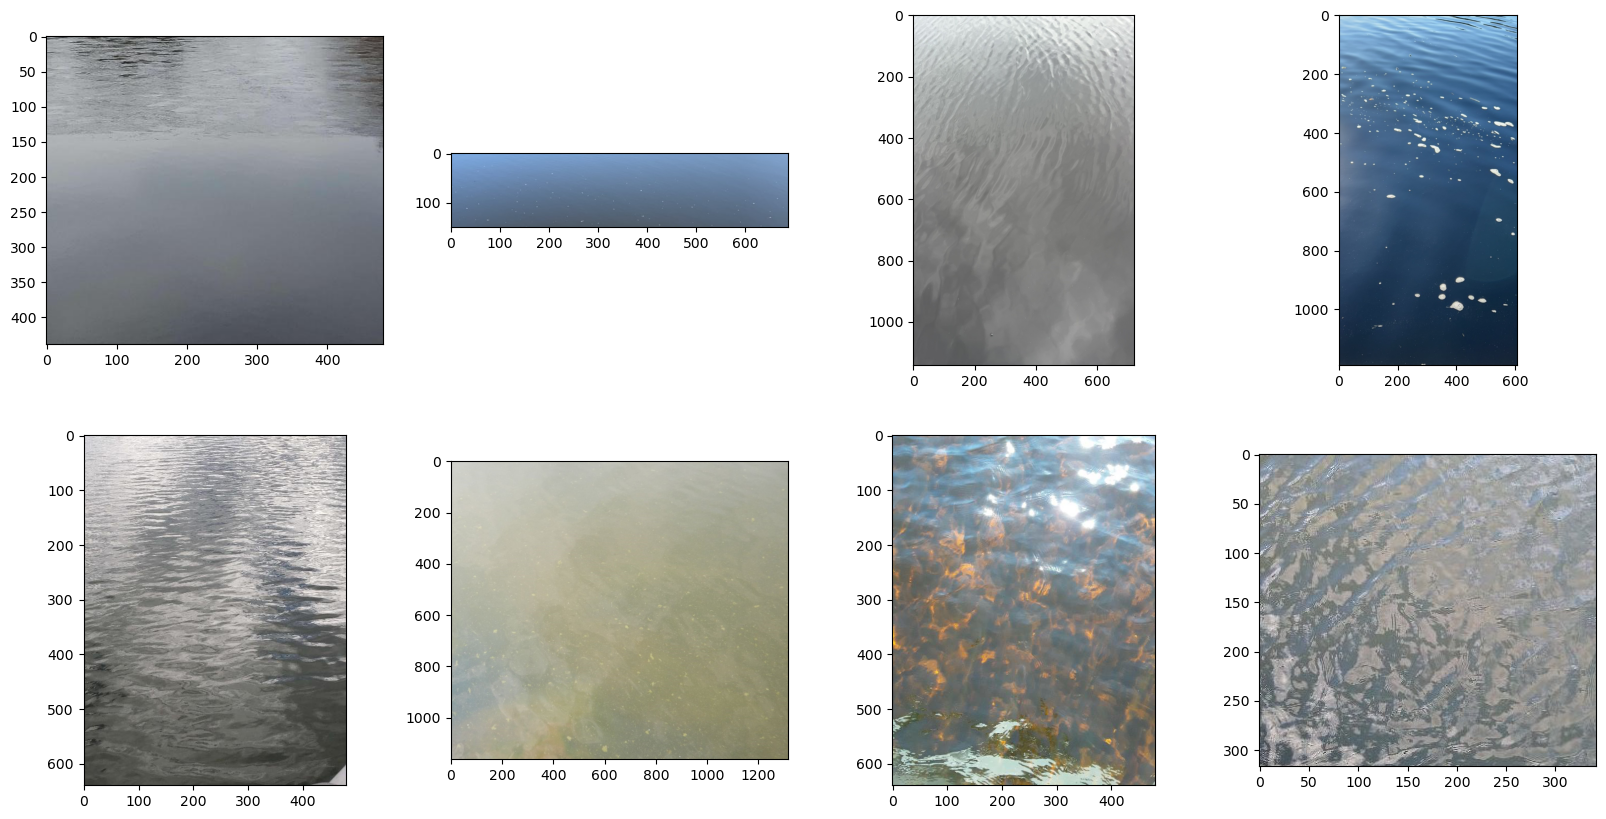

In [15]:
#check first few images of no_advisory
images = []
for idx, img in enumerate(df_no_advisory.image_path):
    img = load_img(
    img)
    images.append(img)
    
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

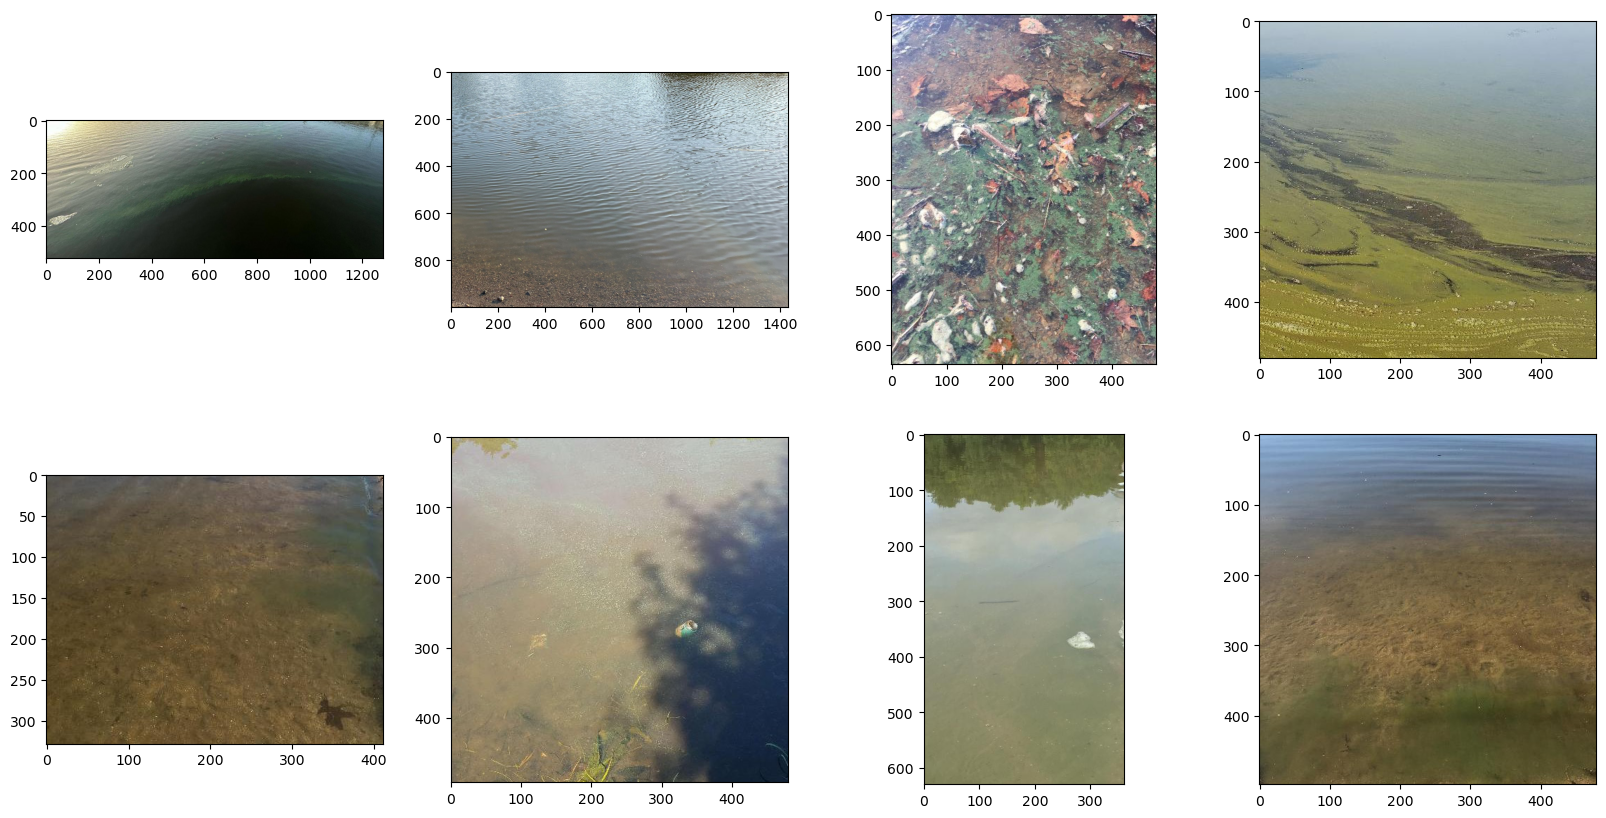

In [16]:
#check first few images of caution
images = []
for idx, img in enumerate(df_caution.image_path):
    img = load_img(
    img)
    images.append(img)
    
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

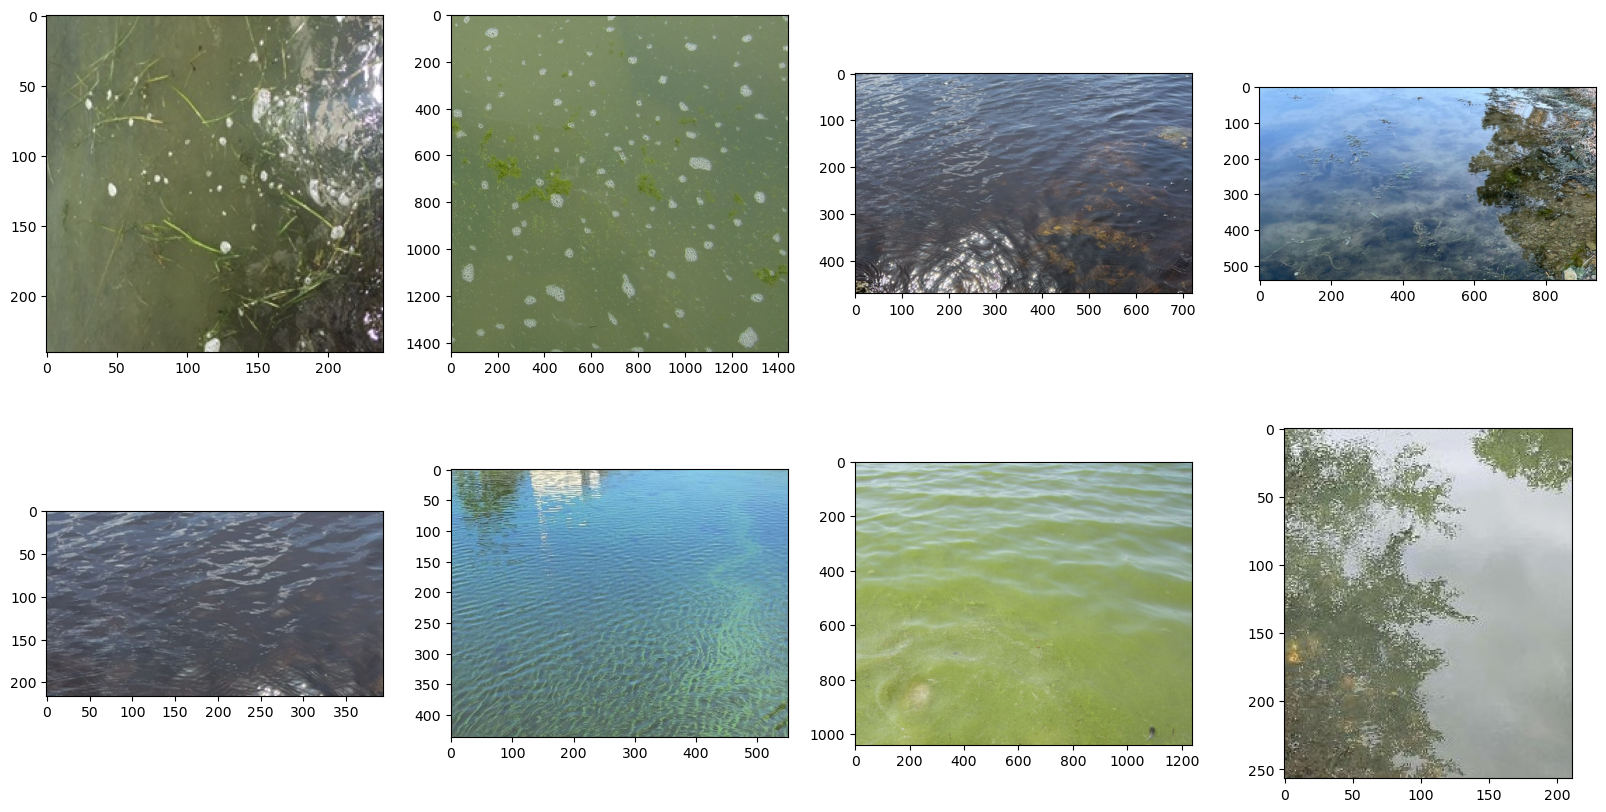

In [17]:
#check first few images of warning
images = []
for idx, img in enumerate(df_warning.image_path):
    img = load_img(
    img)
    images.append(img)
    
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

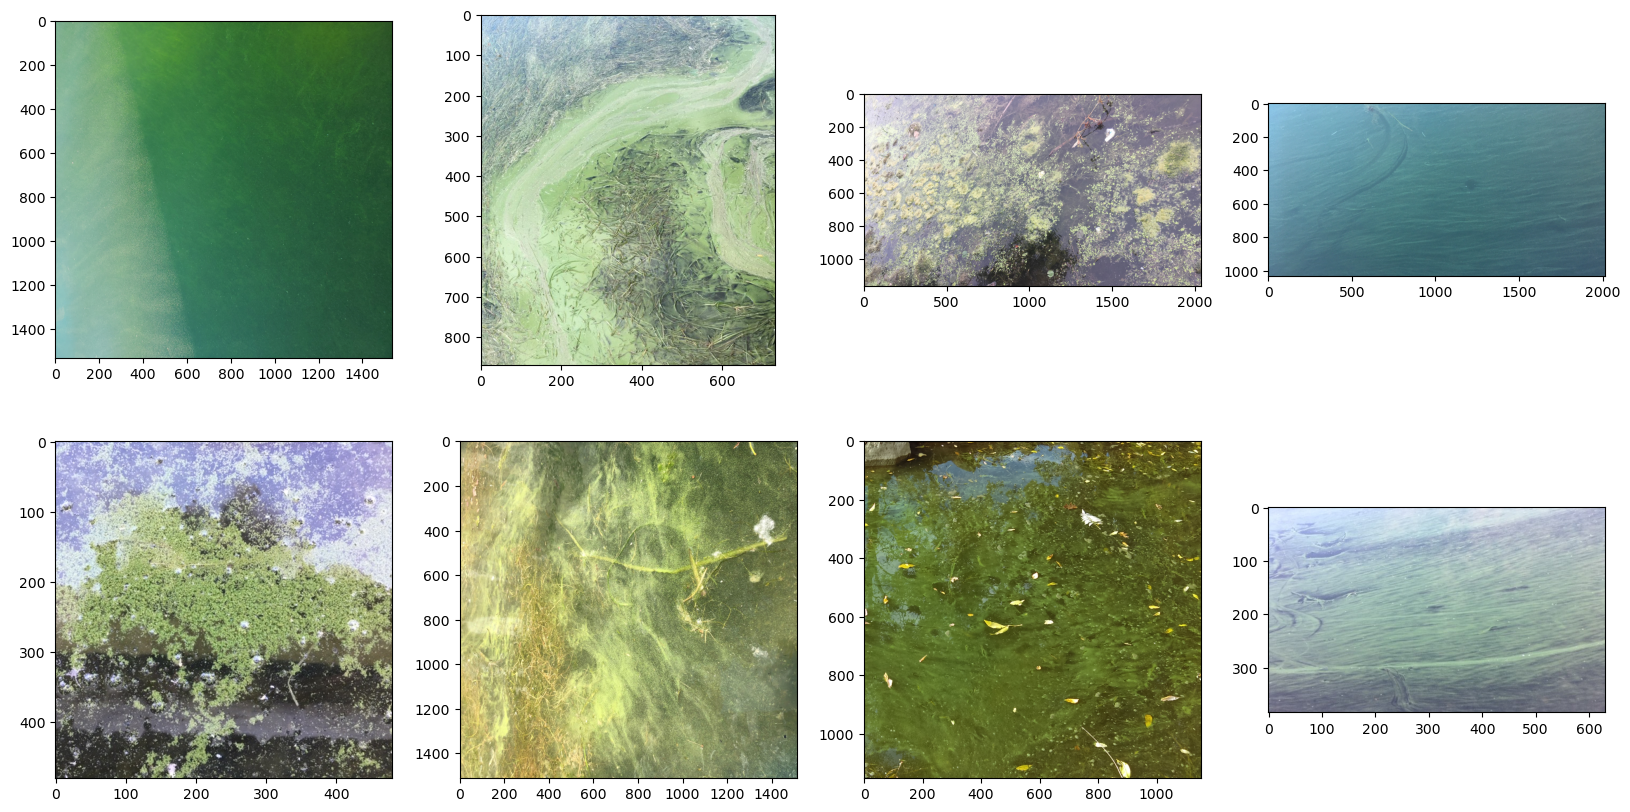

In [18]:
#check first few images of danger
images = []
for idx, img in enumerate(df_danger.image_path):
    img = load_img(
    img)
    images.append(img)
    
nrows, ncols = 2,4 #print first 8 images
f, axs = plt.subplots(nrows, ncols, figsize=(20,10))
indx = 0
for i in range(nrows):
    for j in range(ncols):
        axs[i,j].imshow(images[indx])
        indx += 1

## Size of the Images 

In [64]:
#Changing test set to match format of training data. This is independent to the following preprocessing functions because augmentations are not required
def preprocess1(data):
    images_mini = []
    
    #basically two arrays with images and labels
    for img in (data.image_path):
        img = load_img(img, target_size = (224,224))
        
        img = img_to_array(img)
        
        images_mini.append(img)
    #turns the array into a numpy array with each element in a seperate dimension
    images_mini = np.stack(images_mini)
    y_mini = np.array(data.encoded_labels).flatten()
    return images_mini, y_mini

In [30]:
X_test, y_test = preprocess1(test_df)
images_mini, y_mini = preprocess1(upsampled_train_df)
print(f"images_mini shape {images_mini.shape}")
print(f"y_mini shape {y_mini.shape}")

images_mini shape (674, 224, 224, 3)
y_mini shape (674,)


2023-11-17 14:29:43.571642: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


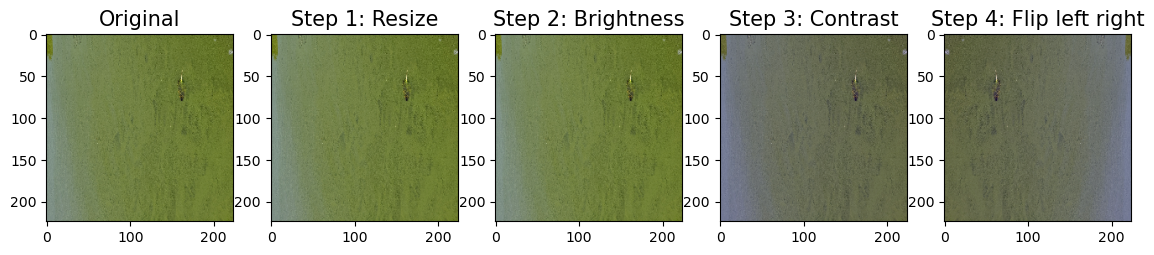

In [21]:
tf.random.set_seed(1234)

fig = plt.figure(figsize=(14, 12))

# pull first image from data
image = images_mini[0]

# plot original
ax = fig.add_subplot(1, 5, 1)
ax.imshow(array_to_img(image))
ax.set_title('Original', size=15);

# resize
ax = fig.add_subplot(1, 5, 2)
img_resize = tf.image.resize(image, size=(224, 224))
ax.imshow(array_to_img(img_resize))
ax.set_title('Step 1: Resize', size=15);


# adjust brightness
ax = fig.add_subplot(1, 5, 3)
img_bright = tf.image.adjust_brightness(img_resize, 0.3)
ax.imshow(array_to_img(img_bright))
ax.set_title('Step 2: Brightness', size=15);


# adjust contrast
ax = fig.add_subplot(1, 5, 4)
img_contrast = tf.image.adjust_contrast(img_bright, contrast_factor=3)
ax.imshow(array_to_img(img_contrast))
ax.set_title('Step 3: Contrast', size=15);


# flip left right
ax = fig.add_subplot(1, 5, 5)
img_flip = tf.image.flip_left_right(img_contrast)
ax.imshow(array_to_img(img_flip))
ax.set_title('Step 4: Flip left right', size=15);

# Data Preprocessing

## Data Augmentation

In [65]:
contrast = 3
DELTA = 0.3

def preprocess2(images_mini, y_mini, split= (0.8,0.2)):
    tf.random.set_seed(1234)
    np.random.seed(1234)
    shuffle = np.random.permutation(np.arange(images_mini.shape[0]))
    images_mini, y_mini = images_mini[shuffle], y_mini[shuffle]
    
    #splits for validation
    splits = np.multiply(len(images_mini), split).astype(int)
    X_train, X_val = np.split(images_mini, [splits[0]])
    y_train, y_val = np.split(y_mini, [splits[0]])
    
    #greyscaling
    X_train = X_train/255.0
    X_val = X_val/255.0
    
    #image augmentation
    X_train_augm = tf.image.adjust_brightness(X_train, delta = DELTA)
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor = contrast)
    
    #flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)
    
    #concatenate original and augmented
    X_train = tf.concat([X_train, X_train_augm], axis = 0)
    
    #concatenate y_train
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm], axis = 0)
    
    #Shuffle
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype = tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy()
    
    return X_train, y_train, X_val, y_val

In [32]:
X_train, y_train, X_val, y_val = preprocess2(
    images_mini,
    y_mini,
    split=(0.8,0.2)
)

2023-11-17 15:00:30.244094: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
#We have 5104 observations, each having 200x200 pixels, with each pixel having 3 values (which are all the same because they've been greyscaled)
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")

X_train shape (1078, 224, 224, 3)
y_train shape (1078,)
X_val shape (135, 224, 224, 3)
y_val shape (135,)


Print training data examples:


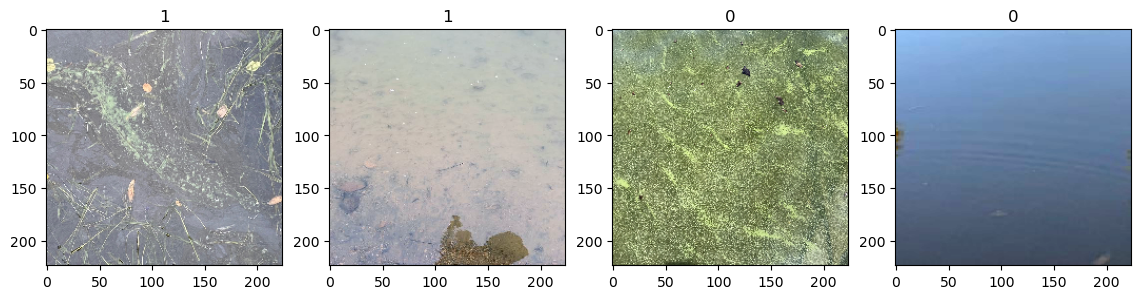

In [25]:
# print taining data
print('Print training data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=y_train[i])

Print validation data examples:


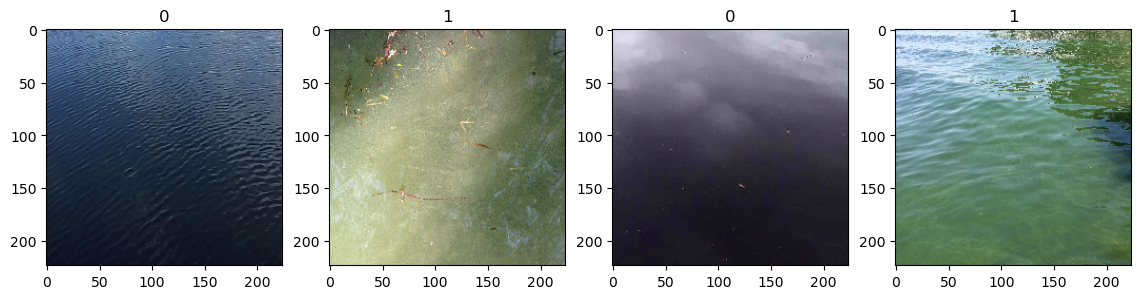

In [26]:
print('Print validation data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_val[i]))
    axs[i].set(title=y_val[i])

# Binary Case

In [27]:
X_train.shape, y_train.shape

(TensorShape([1078, 224, 224, 3]), (1078,))

In [32]:
X_train

<tf.Tensor: shape=(1078, 224, 224, 3), dtype=float32, numpy=
array([[[[ 0.6117647 ,  0.61960787,  0.6666667 ],
         [ 0.63529414,  0.6509804 ,  0.69803923],
         [ 0.61960787,  0.63529414,  0.6784314 ],
         ...,
         [ 0.6392157 ,  0.6862745 ,  0.60784316],
         [ 0.58431375,  0.6117647 ,  0.5803922 ],
         [ 0.6039216 ,  0.62352943,  0.60784316]],

        [[ 0.5921569 ,  0.60784316,  0.6509804 ],
         [ 0.64705884,  0.654902  ,  0.7058824 ],
         [ 0.5921569 ,  0.6       ,  0.6509804 ],
         ...,
         [ 0.58431375,  0.6156863 ,  0.57254905],
         [ 0.45882353,  0.47843137,  0.4627451 ],
         [ 0.49019608,  0.5058824 ,  0.5019608 ]],

        [[ 0.6392157 ,  0.64705884,  0.69411767],
         [ 0.61960787,  0.627451  ,  0.6745098 ],
         [ 0.59607846,  0.6039216 ,  0.654902  ],
         ...,
         [ 0.43529412,  0.45882353,  0.4509804 ],
         [ 0.4745098 ,  0.47843137,  0.49411765],
         [ 0.4862745 ,  0.5058824 ,  0.4901

In [34]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, LeakyReLU
from tensorflow.keras.models import Model
import tensorflow as tf

def residual_block(x, filters, kernel_size=3, stride=1):
    y = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    y = BatchNormalization()(y)
    y = LeakyReLU(alpha=0.01)(y)
    y = Conv2D(filters, kernel_size=kernel_size, padding='same')(y)
    y = BatchNormalization()(y)
    if stride > 1:
        x = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    out = Add()([x, y])
    out = LeakyReLU(alpha=0.01)(out)
    return out

def build_resnet(input_shape, num_blocks, num_classes=1):
    input_tensor = Input(shape=input_shape)
    
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
    
    for _ in range(num_blocks):
        x = residual_block(x, filters=64)
    
    x = GlobalAveragePooling2D()(x)
    output_tensor = Dense(num_classes, activation='sigmoid')(x)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    return model

# Create the ResNet model
input_shape = (224, 224, 3)
num_blocks = 3
model = build_resnet(input_shape, num_blocks)

# Compile the model with metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.AUC(name='auc')])

# Train the model for more epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
34/34 [==============================] - 34s 961ms/step - loss: 0.6043 - accuracy: 0.7013 - precision: 0.6661 - recall: 0.7776 - auc: 0.7714 - val_loss: 0.6738 - val_accuracy: 0.5481 - val_precision: 0.5481 - val_recall: 1.0000 - val_auc: 0.7591
Epoch 2/20
34/34 [==============================] - 33s 976ms/step - loss: 0.5136 - accuracy: 0.7616 - precision: 0.7622 - recall: 0.7433 - auc: 0.8284 - val_loss: 0.6832 - val_accuracy: 0.5630 - val_precision: 0.5564 - val_recall: 1.0000 - val_auc: 0.6504
Epoch 3/20
34/34 [==============================] - 32s 936ms/step - loss: 0.4953 - accuracy: 0.7829 - precision: 0.7734 - recall: 0.7852 - auc: 0.8427 - val_loss: 0.6779 - val_accuracy: 0.5259 - val_precision: 0.5758 - val_recall: 0.5135 - val_auc: 0.6488
Epoch 4/20
34/34 [==============================] - 32s 941ms/step - loss: 0.4761 - accuracy: 0.7820 - precision: 0.7730 - recall: 0.7833 - auc: 0.8526 - val_loss: 0.6690 - val_accuracy: 0.5926 - val_precision: 0.5979 - val_recal

5/5 [==============================] - 1s 181ms/step


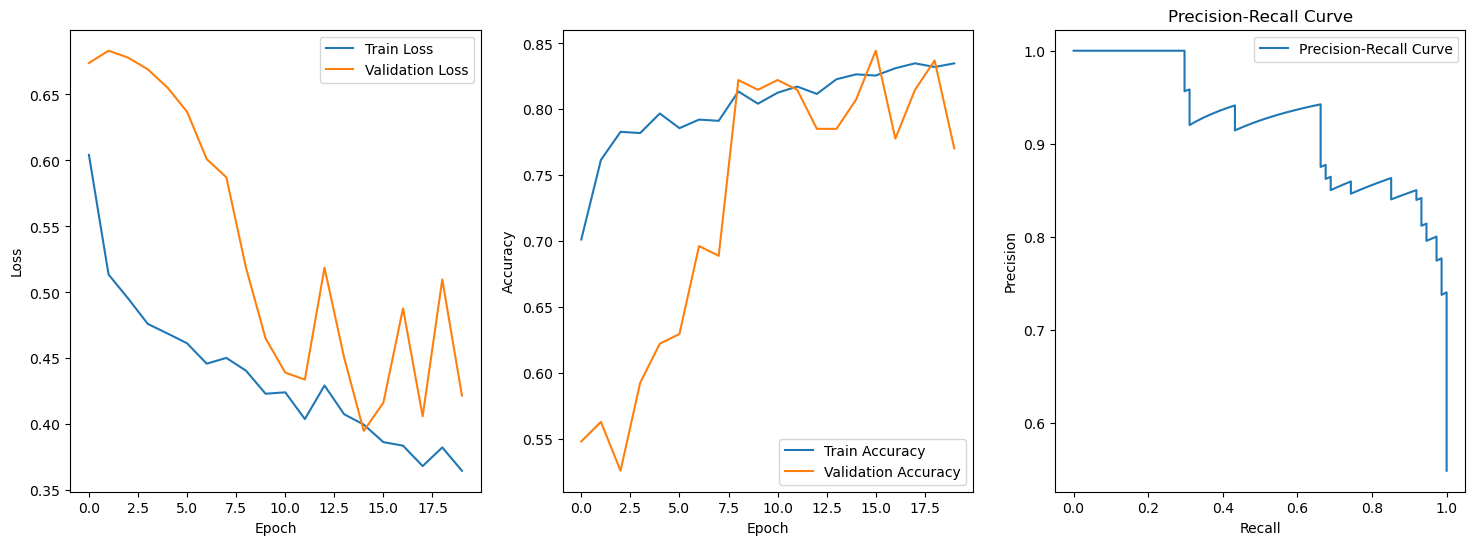

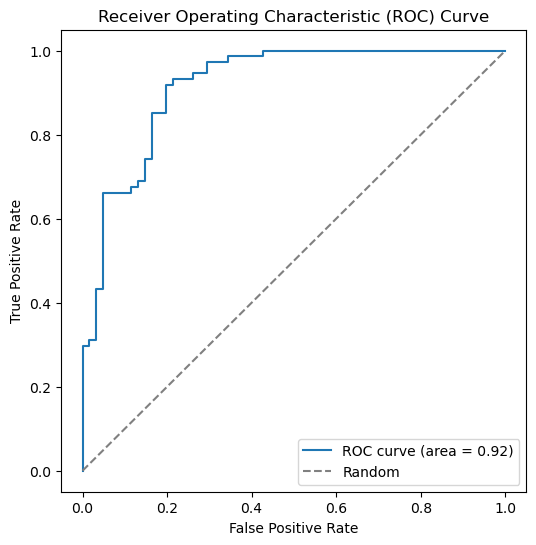

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
precision, recall, _ = precision_recall_curve(y_val, y_val_pred)

# Plotting
plt.figure(figsize=(18, 6))

# Plot loss and accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot precision-recall curve
plt.subplot(1, 3, 3)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.show()

# Multinomial Case (caution, warning, & danger)
- Exclude no_advisory

In [66]:
# remove no_advisory label from train_df
train_df2 = train_df[train_df['label'] != 'no_advisory']

# remove no_advisory label from test_df
test_df2 = test_df[test_df['label'] != 'no_advisory']

In [67]:
# Define a dictionary with the mappings
label_mapping = {
    'caution': 1,
    'warning': 2,
    'danger': 3
}

# Create the 'encoded_labels' column
train_df2['encoded_labels'] = train_df2['label'].map(label_mapping)
test_df2['encoded_labels'] = test_df2['label'].map(label_mapping)

/var/folders/61/t0ms0p4146d2xnzbfxrp9rl40000gn/T/ipykernel_91219/4089197484.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df2['encoded_labels'] = train_df2['label'].map(label_mapping)
/var/folders/61/t0ms0p4146d2xnzbfxrp9rl40000gn/T/ipykernel_91219/4089197484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df2['encoded_labels'] = test_df2['label'].map(label_mapping)


In [68]:
print(train_df2.label.value_counts())
print(test_df2.label.value_counts())

danger     145
caution    110
warning     82
Name: label, dtype: int64
danger     37
caution    27
warning    21
Name: label, dtype: int64


In [69]:
# Upsample to majority class

class_counts = train_df2['label'].value_counts()

# Find the majority class
majority_class = class_counts.idxmax()

# Upsample the minority classes to match the majority class
df_upsampled2 = pd.concat([
    resample(train_df2[train_df2['label'] == cls], replace=True, n_samples=class_counts[majority_class], random_state=42)
    for cls in class_counts.index
])

# Shuffle the upsampled DataFrame to mix the classes
df_upsampled2 = df_upsampled2.sample(frac=1, random_state=42)
df_upsampled2.encoded_labels.value_counts()

1    145
3    145
2    145
Name: encoded_labels, dtype: int64

In [70]:
# Image size
X_test, y_test = preprocess1(test_df2)
images_mini, y_mini = preprocess1(df_upsampled2)
print(f"images_mini shape {images_mini.shape}")
print(f"y_mini shape {y_mini.shape}")

images_mini shape (435, 224, 224, 3)
y_mini shape (435,)


In [71]:
# Data Augmentation
X_train, y_train, X_val, y_val = preprocess2(
    images_mini,
    y_mini,
    split=(0.8,0.2)
)

In [72]:
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_val shape {X_val.shape}")
print(f"y_val shape {y_val.shape}")

X_train shape (696, 224, 224, 3)
y_train shape (696,)
X_val shape (87, 224, 224, 3)
y_val shape (87,)


Print training data examples:


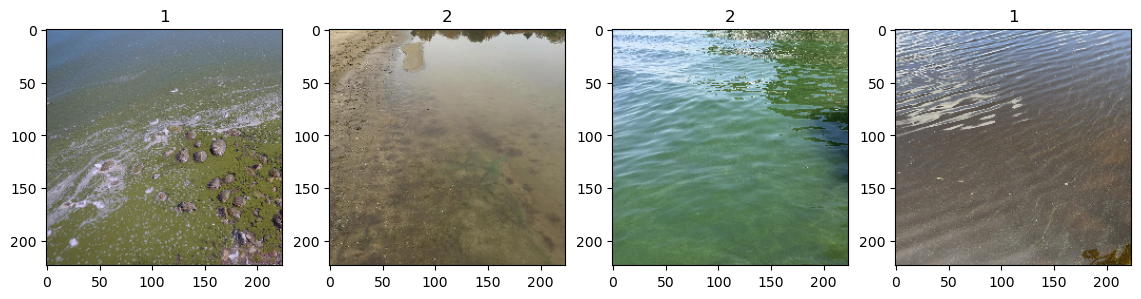

In [73]:
# print taining data
print('Print training data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_train[i]))
    axs[i].set(title=y_train[i])

Print validation data examples:


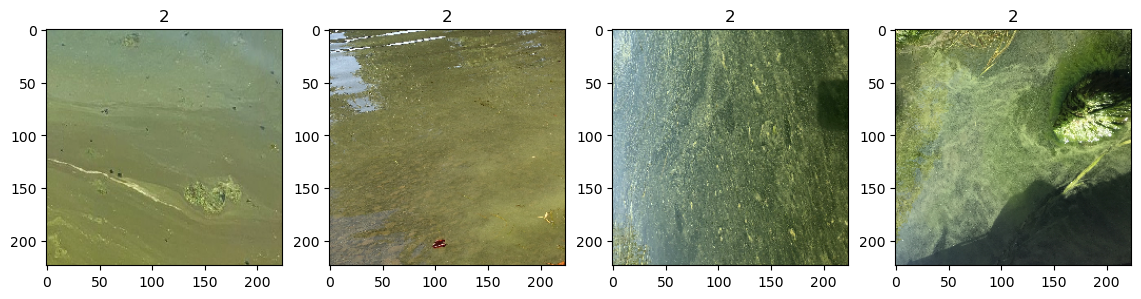

In [74]:
print('Print validation data examples:')
nrows, ncols = 1,4 #print first 4 images
f, axs = plt.subplots(nrows, ncols, figsize=(14,12))
for i in range(ncols):
    axs[i].imshow(array_to_img(X_val[i]))
    axs[i].set(title=y_val[i])

In [79]:
X_train.shape, y_train.shape

(TensorShape([696, 224, 224, 3]), (696,))

In [80]:
# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train - 1, num_classes=3)
y_val_one_hot = tf.keras.utils.to_categorical(y_val - 1, num_classes=3)

# Define the ResNet-50 model
base_model = tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze the convolutional base

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')  # Output layer with 3 neurons for 3 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train_one_hot,
    epochs=10, batch_size=32, validation_data=(X_val, y_val_one_hot)
)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val_one_hot)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

Epoch 1/10
22/22 [==============================] - 30s 1s/step - loss: 1.3023 - accuracy: 0.3563 - val_loss: 1.1515 - val_accuracy: 0.2989
Epoch 2/10
22/22 [==============================] - 28s 1s/step - loss: 1.1656 - accuracy: 0.3448 - val_loss: 1.0953 - val_accuracy: 0.3333
Epoch 3/10
22/22 [==============================] - 28s 1s/step - loss: 1.1113 - accuracy: 0.3520 - val_loss: 1.0981 - val_accuracy: 0.2989
Epoch 4/10
22/22 [==============================] - 28s 1s/step - loss: 1.1086 - accuracy: 0.3420 - val_loss: 1.1001 - val_accuracy: 0.2989
Epoch 5/10
22/22 [==============================] - 28s 1s/step - loss: 1.0893 - accuracy: 0.3894 - val_loss: 1.0957 - val_accuracy: 0.3333
Epoch 6/10
22/22 [==============================] - 28s 1s/step - loss: 1.0884 - accuracy: 0.3693 - val_loss: 1.1071 - val_accuracy: 0.3103
Epoch 7/10
22/22 [==============================] - 29s 1s/step - loss: 1.0781 - accuracy: 0.3994 - val_loss: 1.0946 - val_accuracy: 0.2989
Epoch 8/10
22/22 [==

In [82]:
from sklearn.metrics import classification_report
# Predict on the validation set
y_val_pred_prob = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1) + 1  # Convert back to 1-indexed labels

# Convert true labels to one-hot encoding for consistency with predictions
y_val_one_hot = tf.keras.utils.to_categorical(y_val - 1, num_classes=3)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(X_val, y_val_one_hot)
print(f"Validation accuracy: {val_acc * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

3/3 [==============================] - 3s 1s/step - loss: 1.0990 - accuracy: 0.3448
Validation accuracy: 34.48%
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        34
           2       0.33      0.96      0.49        27
           3       0.50      0.15      0.24        26

    accuracy                           0.34        87
   macro avg       0.28      0.37      0.24        87
weighted avg       0.25      0.34      0.22        87



/opt/anaconda3/envs/w207_final/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/w207_final/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/w207_final/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
